In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import cufflinks as cf
import plotly

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
cf.go_offline(connected=True)

In [8]:
plt.style.use('seaborn-v0_8-darkgrid')

# Get the Data

In [9]:
kyphosis_df = pd.read_csv('kyphosis.csv')

In [10]:
kyphosis_df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [11]:
kyphosis_df.shape

(81, 4)

In [12]:
kyphosis_df['Age'].iplot(kind='hist');

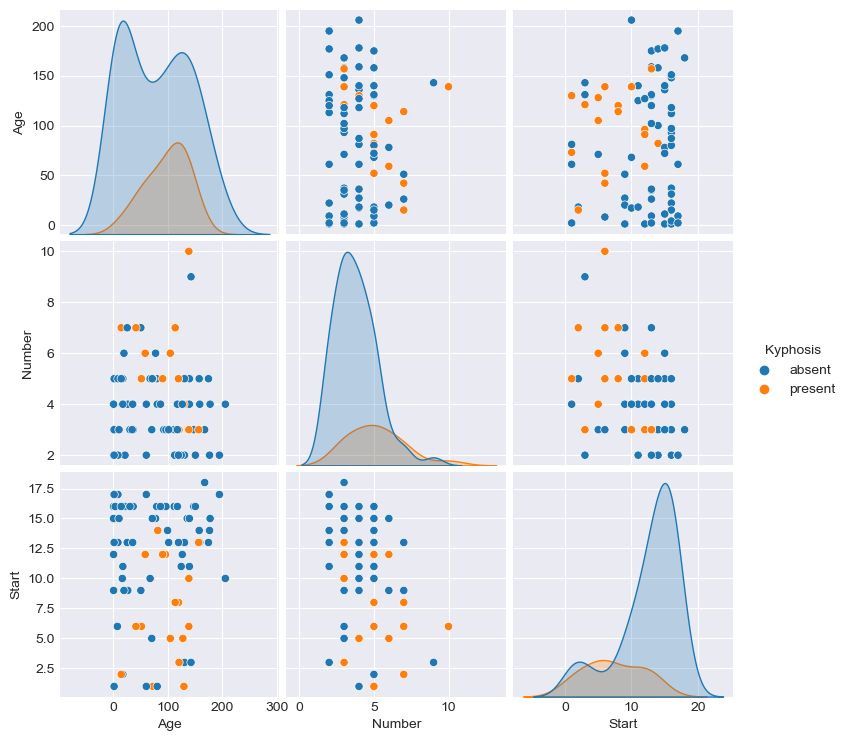

In [13]:
sns.pairplot(kyphosis_df, hue='Kyphosis');

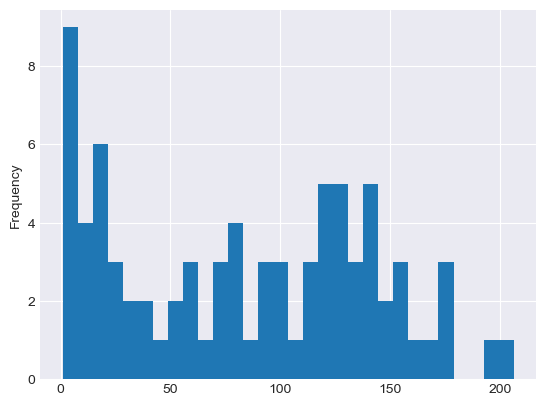

In [17]:
kyphosis_df['Age'].plot(kind='hist', bins=30);

In [18]:
X = kyphosis_df.drop('Kyphosis', axis=1)

y = kyphosis_df['Kyphosis']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [20]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [21]:
pred = dtree.predict(X_test)

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

In [23]:
print(classification_report(y_test, pred))
print('\n')
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

      absent       0.68      0.76      0.72        17
     present       0.33      0.25      0.29         8

    accuracy                           0.60        25
   macro avg       0.51      0.51      0.50        25
weighted avg       0.57      0.60      0.58        25



[[13  4]
 [ 6  2]]


In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rfc = RandomForestClassifier(n_estimators=200)

In [26]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [28]:
rfc_pred = rfc.predict(X_test)

In [29]:
print(classification_report(y_test, rfc_pred))
print('\n')
print(confusion_matrix(y_test, rfc_pred))

              precision    recall  f1-score   support

      absent       0.74      1.00      0.85        17
     present       1.00      0.25      0.40         8

    accuracy                           0.76        25
   macro avg       0.87      0.62      0.62        25
weighted avg       0.82      0.76      0.71        25



[[17  0]
 [ 6  2]]
